# Dependencies
1. openCV - my version 4.4.0.46 
2. PIMS - my version 0.5
3. Scikitimage - my version 0.16.2
4. trackpy - my version 0.4.2

The usual:
1. Numpy - my version 1.16.4
2. Pandas - my version 1.0.5
3. Matplotlib - my version 3.2.2
4. OS

# 1. Extract images from video
Dark cells on light background

In [27]:
# This takes some time. Took about a minute on my computer with a 1500 frame video. 
# Each frame is saved as a tiff file.
import cv2
vidcap = cv2.VideoCapture('P5.avi')
def getFrame(sec):
    #vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    vidcap.set(cv2.CAP_PROP_FPS, 15.54)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".tiff", image)     # save frame as tiff file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 1/15.54 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

# 2. Measure centroid of the bacterial cell from one image

# 2.1 Opening the 1st frame

In [28]:
import numpy as np
import pandas as pd
import pims
import matplotlib.pyplot as plt

In [29]:
images = pims.open('./*.tiff') #reading all tiff files

In [30]:
images

<Frames>
Source: /home/nkr/Desktop/Phage-delivery-main/*.tiff
Length: 35 frames
Frame Shape: (512, 512, 3)
Pixel Datatype: uint8

In [31]:
print(images[0])  # the first frame

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0  16   0]
  [  0  18   0]
  [  0  28   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0  12   0]
  [  0  40   0]
  [  0  22   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0   7   0]
  [  0  23   0]
  [  0  23   0]]

 ...

 [[  0   4   0]
  [  0   1   0]
  [  0   3   0]
  ...
  [  0   3   0]
  [  0   8   0]
  [  0   0   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   2   0]
  ...
  [  0   4   0]
  [  0   1   0]
  [  0   3   0]]

 [[  0   4   0]
  [  0   1   0]
  [  0   7   0]
  ...
  [  0   3   0]
  [  0   3   0]
  [  0   2   0]]]


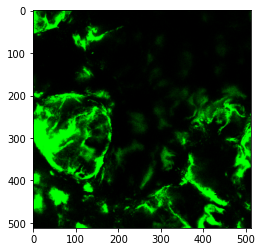

In [32]:
plt.imshow(images[0]) # the first frame
# Can also check other frames . eg. plt.imshow(images[1400])

# 2.2 Determining the correct threshold

In [33]:
from skimage.color import rgb2gray
gs = rgb2gray(images[0])
gs2=gs

In [34]:
gs2 # the number below will help develop an intution of the threshold

array([[0.7154    , 0.7154    , 0.7154    , ..., 0.04488784, 0.05049882,
        0.07855373],
       [0.7154    , 0.7154    , 0.7154    , ..., 0.03366588, 0.11221961,
        0.06172078],
       [0.7154    , 0.7154    , 0.7154    , ..., 0.01963843, 0.06452627,
        0.06452627],
       ...,
       [0.01122196, 0.00280549, 0.00841647, ..., 0.00841647, 0.02244392,
        0.        ],
       [0.00280549, 0.00280549, 0.00561098, ..., 0.01122196, 0.00280549,
        0.00841647],
       [0.01122196, 0.00280549, 0.01963843, ..., 0.00841647, 0.00841647,
        0.00561098]])

In [35]:
from skimage import data
from skimage.filters import threshold_triangle
#gs2= data.camera()
thresh = 0.33

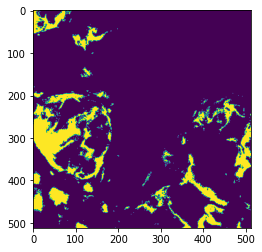

In [36]:
#thresh = .96 # Adjust the threshold here
binary = gs2 > thresh
plt.imshow(binary)

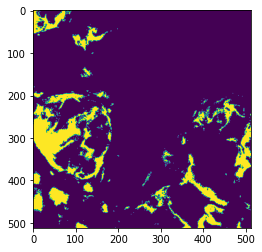

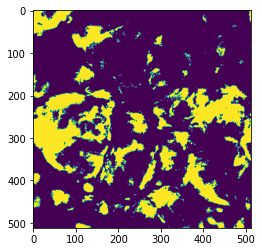

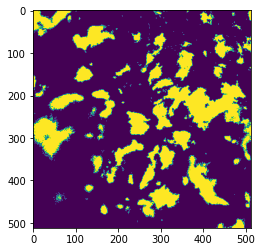

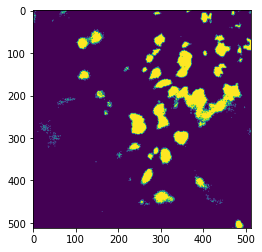

In [37]:
counter = 0
for image in images:   #showing multiple frames with a loop
    gs1_2 = rgb2gray(image)
    gs2_2=gs1_2
    binary1_2 = gs2_2 > thresh
    counter = counter + 1
    if counter == 1:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 10:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 20:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 30:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 40:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 50:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 60:
        plt.figure()
        plt.imshow(binary1_2)
    if counter == 70:
        plt.figure()
        plt.imshow(binary1_2)

# Note: Proceed only if threshold above is good

# 2.3 Measuring the centroid of one frame

In [38]:
from skimage import measure
labels = measure.label(binary)
props = measure.regionprops(labels)
lr =[]
aa2=[]
for prop in props:
    print('Label: {} >> Area: {}'.format(prop.label, prop.area))
    aa = [prop.label,prop.area,prop.centroid,prop.major_axis_length,prop.minor_axis_length]
    aa2 += aa
    lr.append(aa)

Label: 1 >> Area: 1872
Label: 2 >> Area: 1
Label: 3 >> Area: 44
Label: 4 >> Area: 18
Label: 5 >> Area: 1
Label: 6 >> Area: 2
Label: 7 >> Area: 5
Label: 8 >> Area: 7
Label: 9 >> Area: 2
Label: 10 >> Area: 1
Label: 11 >> Area: 1
Label: 12 >> Area: 1334
Label: 13 >> Area: 1
Label: 14 >> Area: 2
Label: 15 >> Area: 1
Label: 16 >> Area: 3
Label: 17 >> Area: 17
Label: 18 >> Area: 3
Label: 19 >> Area: 1
Label: 20 >> Area: 8
Label: 21 >> Area: 194
Label: 22 >> Area: 23
Label: 23 >> Area: 2
Label: 24 >> Area: 1
Label: 25 >> Area: 4
Label: 26 >> Area: 8
Label: 27 >> Area: 2
Label: 28 >> Area: 181
Label: 29 >> Area: 9
Label: 30 >> Area: 222
Label: 31 >> Area: 1
Label: 32 >> Area: 1
Label: 33 >> Area: 1210
Label: 34 >> Area: 1
Label: 35 >> Area: 6
Label: 36 >> Area: 1
Label: 37 >> Area: 1
Label: 38 >> Area: 1
Label: 39 >> Area: 1
Label: 40 >> Area: 1
Label: 41 >> Area: 1
Label: 42 >> Area: 1
Label: 43 >> Area: 1
Label: 44 >> Area: 16
Label: 45 >> Area: 2
Label: 46 >> Area: 1
Label: 47 >> Area: 4
La

Decide the area threshold based on the numbers above

In [39]:
from pandas import DataFrame
Outprops = DataFrame (lr,columns=['Cell#_arbit','Area','Centroid','Majoraxis','Minoraxis'])
Outprops

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,1872,"(26.85576923076923, 31.4107905982906)",98.197259,50.476029
1,2,1,"(0.0, 67.0)",0.000000,0.000000
2,3,44,"(3.659090909090909, 84.06818181818181)",12.212179,9.468688
3,4,18,"(7.5, 13.5)",10.949979,4.817579
4,5,1,"(12.0, 17.0)",0.000000,0.000000
...,...,...,...,...,...
390,391,1,"(503.0, 286.0)",0.000000,0.000000
391,392,1,"(504.0, 478.0)",0.000000,0.000000
392,393,1,"(506.0, 487.0)",0.000000,0.000000
393,394,1,"(511.0, 193.0)",0.000000,0.000000


In [40]:
# Apply area filer here
at = 1
df3 = Outprops[~(Outprops['Area'] <= at)]  
df3

,Cell#_arbit,Area,Centroid,Majoraxis,Minoraxis
0,1,1872,"(26.85576923076923, 31.4107905982906)",98.197259,50.476029
2,3,44,"(3.659090909090909, 84.06818181818181)",12.212179,9.468688
3,4,18,"(7.5, 13.5)",10.949979,4.817579
5,6,2,"(12.5, 53.5)",2.828427,0.000000
6,7,5,"(21.6, 88.6)",4.341695,1.276589
...,...,...,...,...,...
384,385,4,"(496.0, 201.5)",3.236068,1.236068
385,386,98,"(505.234693877551, 483.33673469387753)",16.886290,9.007622
386,387,238,"(506.5042016806723, 111.4201680672269)",28.579730,12.004381
387,388,2,"(501.5, 61.5)",2.828427,0.000000


### Is the result of the cell below similar to the number of cells that you can manually count in the image below? If yes, all is good. You can proceed with the for loop.

Number of cells =  177


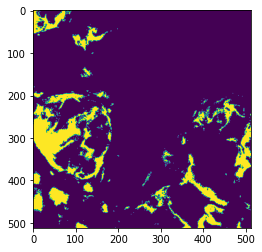

In [41]:
ncells = df3.shape[0]
print('Number of cells = ', ncells)
plt.imshow(binary)

# 3. Use for loop and measure centroid from all images (frames)

In [42]:
# This loop will take some time. For 1500 frames, ~10 cell/frame, it took 1.5 minutes
frame = 0
Outprops2 = pd.DataFrame([])

for image in images:
    gs1 = rgb2gray(image)
    gs2_1=gs1
    binary1 = gs2_1 > thresh
    labels = measure.label(binary1)
    props = measure.regionprops(labels)
    
    lr1 =[]
    frame = frame + 1 
    for prop in props:
        #print('Label: {} >> Area: {}'.format(prop.label, prop.area))
        centroid = [prop.centroid]
        cpx = centroid[0][0]
        
        cpy = centroid[0][1]
        aa1 = [prop.area,cpx,cpy,prop.major_axis_length,prop.minor_axis_length,frame]
        lr1.append(aa1)
        
    
    Outprops1 = DataFrame(lr1,columns=['mass','x','y','Majoraxis','Minoraxis','frame'])    
    # Apply area filer here
    
    Outprops2 = Outprops2.append(Outprops1)
    df3 = Outprops2[~(Outprops2['mass'] <= at)]  # this is the area filter to remove noise
    

In [43]:
df3
df31=pd.DataFrame(data=df3, columns=['mass','frame',])
#df31.to_csv('c1g.csv')

In [44]:
df31

,mass,frame
0,1872,1
2,44,1
3,18,1
5,2,1
6,5,1
...,...,...
311,9,35
312,6,35
315,2,35
320,89,35


# 4. Plot the Centroid for all frames

In [45]:
i = np.unique(df31['frame'])

In [46]:


df311 = df31.groupby(["frame"]).mass.sum().reset_index()
df311

,frame,mass
0,1,31198
1,2,34752
2,3,38993
3,4,42617
4,5,46765
5,6,51047
6,7,54559
7,8,57955
8,9,60436
9,10,62923


In [47]:
df311.to_csv('e2g.csv')

# 5. 3d reconstruction of Z-stack

In [48]:
# Gives cube till 200
from skimage.color import rgb2gray
counter = 0
m=[]
for image in images:
    counter = counter +1
    gs1_2 = rgb2gray(image)
    gs2_2=gs1_2
    binary1_2 = gs2_2 > thresh
    p=binary1_2 
    x = p.astype(int)
    x1 = x[:,0:200] #change the pixel numbers accordingly
    if counter == 1:
        arr4 = x1
    if counter > 1:
        arr4=np.dstack([arr4, x1])
   

In [49]:
# Plots cube till 200
from tvtk.api import tvtk
import numpy as np
from mayavi import mlab
b=(0.009,.74,.351)
mag=(0,0,0)
c=(mag,b)
mlab.figure( fgcolor=(0.5, 1, 0), bgcolor=(1, 1, 1))
i = tvtk.ImageData(spacing=(1, 1, 1), origin=(0, 0, 0))
i.point_data.scalars = arr4.ravel()
i.point_data.scalars.name = 'scalars'
i.dimensions = (35,200,512)
mlab.pipeline.surface(i)
mlab.view(125, 135)
mlab.show()

In [50]:
#gives entire cube
from skimage.color import rgb2gray
from tvtk.api import tvtk
import numpy as np
from mayavi import mlab
counter = 0
m=[]
for image in images:
    counter = counter +1
    gs1_2 = rgb2gray(image)
    gs2_2=gs1_2
    binary1_2 = gs2_2 > thresh
    p=binary1_2 
    x = p.astype(int)
    if counter == 1:
        arr5 = x
    if counter > 1:
        arr5=np.dstack([arr5, x])

In [52]:
#plots entire cube
from tvtk.api import tvtk
import numpy as np
import mayavi 
from mayavi import mlab
b=(0.009,.74,.351)
mag=(0,0,0)
c=(mag,b)
mlab.figure( fgcolor=(0.5, 1, 0), bgcolor=(1, 1, 1))
i = tvtk.ImageData(spacing=(1, 1, 1), origin=(0, 0, 0))
i.point_data.scalars = arr5.ravel()
i.point_data.scalars.name = 'scalars'
i.dimensions = (35,512,512)
l=mlab.pipeline.surface(i,colormap='winter')
mlab.view(0, -90)
#mlab.savefig(filename="c15.jpg", size=(400, 450))
mlab.show()




In [ ]:
# Gives one x-y plane
from skimage.color import rgb2gray
from tvtk.api import tvtk
import numpy as np
from mayavi import mlab
counter = 0
m=[]
for image in images:
    counter = counter +1
    gs1_2 = rgb2gray(image)
    gs2_2=gs1_2
    binary1_2 = gs2_2 > thresh
    p=binary1_2 
    x = p.astype(int)
    #x1 = x[:,201:512]
    if counter == 1:
        arr3 = x
    if counter > 1:
        arr3=np.dstack([arr3, x])
        if counter == 34:
            i = tvtk.ImageData(spacing=(1, 1, 1), origin=(0, 0, 0))
            mlab.figure( fgcolor=(0.5, 1, 0), bgcolor=(1, 1, 1))
            i.point_data.scalars = x.ravel()
            i.point_data.scalars.name = 'scalars'
            i.dimensions = (512,512,1)
            mlab.pipeline.surface(i)
            mlab.view(125, -135)
            mlab.show() 
            #plt.imshow(x)
        
    

# 6. Delete all tiffs (if needed)

In [ ]:
import os
cwd = os.getcwd()
import os

dir_name = cwd
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".tiff"):
        os.remove(os.path.join(dir_name, item))